# Trabajo Final de Data Science 2024-2025:

El trabajo consiste en analizar un dataset libremente elegido por cada grupo, que constará de 2 alumnos.

El objetivo es que cada grupo sea capaz de llevar a cabo un análisis riguroso de los datos, así como de exponer y visualizar las conclusiones alcanzadas de forma convincente.

El trabajo puede llevarse a cabo tanto en R como en Python. Se entregará un ZIP file script con el código, datos necesarios y un informe del trabajo.

Se valorará los siguientes apartados:

1. Correcta definición del estudio que se quiere llevar a cabo, estableciendo claramente las preguntas que se pretender analizar en el estudio.

2. Uso adecuado de las distintas técnicas analíticas explicada durante el curso, incluyendo estadística inferencial y contraste de hipótesis, PCA, modelos de regresión lineal, incluyendo regularización, modelos de regresión logística, selección de variables, métodos de clustering.

3. Uso adecuado de técnicas de procesamiento de datos y visualización explicadas durante el curso.

4. Estilo adecuado y profesional en el informe entregado. Puede ser tanto en inglés como en castellano.

5. Presentación oral de los resultados del trabajo.  

Se adjunta un ejemplo de trabajo realizado el curso anterior. No es un trabajo perfecto. Tiene algunos fallos, particularmente se echan en falta un mejor uso de contraste de hipótesis para sustanciar los resultados e hipótesis generadas. Sin embargo, sirve como ejemplo para ver lo que se pide.

Fecha de Entrega: 06/11/2024

Fecha de Presentaciones: 12/11/2024, 15:00

## Datos:
(Jaime)
(explicación del dataset: columnas, tipos de datos, tamaño, fuente de los datos(link)...)

El dataset que se ha usado para este trabajo se ha obtenido de Kaggle. Con un tamaño de 371.03 kB y cuyo link es el siguiente: [https://www.kaggle.com/datasets/valakhorasani/electric-vehicle-charging-patterns](https://www.kaggle.com/datasets/valakhorasani/electric-vehicle-charging-patterns)


Este dataset proporciona un análisis exhaustivo de los patrones de carga de vehículos eléctricos (VE) y el comportamiento de los usuarios. Contiene 1,320 muestras de datos de sesiones de carga, incluyendo métricas como el consumo de energía, la duración de la carga y los detalles del vehículo. Cada entrada captura varios aspectos del uso de VE (20 columnas), permitiendo un análisis profundo y modelado predictivo.

Características Clave:

* ID de Usuario (**User ID**): Identificador único para cada usuario.
    - String

* Modelo del Vehículo (**Vehicle Model**): Modelo del vehículo eléctrico que se está cargando (por ejemplo, Tesla Model 3, Nissan Leaf). 
    - String

* Capacidad de Batería [kWh] (**Battery Capacity [kWh]**): Capacidad total de la batería del vehículo en kilovatios-hora. 
    - Float64

* ID de la Estación de Carga (**Charging Station ID**): Identificador único para la estación de carga utilizada.
    - String

* Ubicación de la Estación de Carga (**Charging Station Location**): Ubicación geográfica de la estación de carga (por ejemplo, Nueva York, Los Ángeles).
    - String

* Hora de Inicio de la Carga (**Charging Start Time**): Marca temporal que indica cuándo comenzó la sesión de carga.
    - String

* Hora de Fin de la Carga (**Charging End Time**) : Marca temporal que indica cuándo terminó la sesión de carga.
    - String

* Energía Consumida [kWh] (**Energy Consumed [kWh]**): Energía total consumida durante la sesión de carga, medida en kilovatios-hora.
    - Float64

* Duración de la Carga [horas] (**Charging Duration [hours]**): Tiempo total empleado para cargar el vehículo, medido en horas.
    - Float64

* Tasa de Carga [kW] (**Charging Rate [kW]**): Tasa promedio de entrega de energía durante la sesión de carga, medida en kilovatios.
    - Float64

* Costo de Carga [USD] (**Charging Cost [USD]**): Costo total incurrido por la sesión de carga, medido en dólares estadounidenses.
    - Float64

* Hora del Día (**Time of Day**): Segmento temporal cuando ocurrió la carga (por ejemplo, Mañana, Tarde).
    - String

* Día de la Semana (**Day of Week**): Día de la semana en que ocurrió la carga (por ejemplo, Lunes, Martes).
    - String

* Estado de Carga (Inicio %) (**State of Charge (Start %)**): Porcentaje de carga de la batería al inicio de la sesión de carga.
    - Float64

* Estado de Carga (Fin %) (**State of Charge (End %)**): Porcentaje de carga de la batería al final de la sesión de carga.
    - Float64

* Distancia Recorrida (desde la última carga) (km) (**Distance Driven (since last charge)(km)**): Distancia recorrida desde la última sesión de carga medida en kilómetros.
    - Float64

* Temperatura [°C] (**Temperature [°C]**): Temperatura ambiente durante la sesión de carga, medida en grados Celsius.
    - Float64

* Antigüedad del Vehículo [años] (**Vehicle Age [years]**): Edad del vehículo eléctrico, medida en años.
    - Float64

* Tipo de Cargador (**Charger Type**): Tipo de cargador utilizado (por ejemplo, Nivel 1, Nivel 2, Cargador Rápido DC).
    - String

* Tipo de Usuario (**User Type**): Clasificación del usuario según sus hábitos de conducción (por ejemplo, Commuter, Viajero de Larga Distancia).
    - String



## Metodología:

- Análisis del problema ¿Qué queremos?
- Visualización de los datos en crudo.
- Procesado de los datos.
- Representación de los datos y sus relaciones. (EDA)
- Contraste de hipotesis (Luis).
- Todo el tema de estadistica y machine learning.


# Importaciones para el proyecto:

In [171]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt



# Cargar los datos:

In [172]:
raw_data = pd.read_csv('DatasetDS/ev_charging_patterns.csv')
print(raw_data.head(5))
print(raw_data.describe())
print(f"Columnas numericas = {raw_data.describe().columns}")

  User ID Vehicle Model  Battery Capacity (kWh) Charging Station ID  \
0  User_1        BMW i3              108.463007         Station_391   
1  User_2  Hyundai Kona              100.000000         Station_428   
2  User_3    Chevy Bolt               75.000000         Station_181   
3  User_4  Hyundai Kona               50.000000         Station_327   
4  User_5  Hyundai Kona               50.000000         Station_108   

  Charging Station Location  Charging Start Time    Charging End Time  \
0                   Houston  2024-01-01 00:00:00  2024-01-01 00:39:00   
1             San Francisco  2024-01-01 01:00:00  2024-01-01 03:01:00   
2             San Francisco  2024-01-01 02:00:00  2024-01-01 04:48:00   
3                   Houston  2024-01-01 03:00:00  2024-01-01 06:42:00   
4               Los Angeles  2024-01-01 04:00:00  2024-01-01 05:46:00   

   Energy Consumed (kWh)  Charging Duration (hours)  Charging Rate (kW)  \
0              60.712346                   0.591363        

Como se puede ver en el resultado de .describe, en algunas columnas faltan datos. Estas columnas son "Energy Consumed (kWh)", "Charging Rate (kW)","Distance Driven (since last charge) (km)". De las cuales faltan exáctamente 66 datos en cada una de las columnas, de forma aleatoria, es decir, no coinciden las filas con las columnas de los otros datos que faltan.

Para solucionar el tema de los datos faltantes rellenaremos dichos campos con la mediana.

Además aplicaremos un redondeo a algunas de las columnas, porque hay en dichas columnas muchos datos enteros y algún que otro dato con muchos decimales. Lo que significa que lo sdatos enteros han sido introducidos sin ser estas medidas precisas.

## Feature Engineering:

In [173]:
# Llenar valores NaN con la mediana para columnas seleccionadas
for column in ['Battery Capacity (kWh)', 'Energy Consumed (kWh)', 'Charging Duration (hours)', 
               'Charging Rate (kW)', 'Charging Cost (USD)', 'State of Charge (Start %)', 
               'State of Charge (End %)', 'Distance Driven (since last charge) (km)', 
               'Temperature (°C)', 'Vehicle Age (years)']:
    raw_data[column].fillna(raw_data[column].median(), inplace=True)

# Redondear valores de Battery Capacity y Vehicle Age a 0 decimales
raw_data['Battery Capacity (kWh)'] = raw_data['Battery Capacity (kWh)'].round(0)
raw_data['Vehicle Age (years)'] = raw_data['Vehicle Age (years)'].round(0)

# Crear la columna 'Percentage of Charge'
raw_data['Percentage of Charge'] = raw_data['State of Charge (End %)'] - raw_data['State of Charge (Start %)']

# Añadir nuevas características al dataset
raw_data['Charging Efficiency (kWh/h)'] = raw_data['Energy Consumed (kWh)'] / raw_data['Charging Duration (hours)']
raw_data['Energy per Charge %'] = raw_data['Energy Consumed (kWh)'] / \
                                    (raw_data['State of Charge (End %)'] - raw_data['State of Charge (Start %)'])
raw_data['Distance per kWh'] = raw_data['Distance Driven (since last charge) (km)'] / raw_data['Energy Consumed (kWh)']
raw_data['Total Charge Gained'] = raw_data['State of Charge (End %)'] - raw_data['State of Charge (Start %)']
raw_data['Charger Efficiency'] = raw_data['Charging Rate (kW)'] / raw_data['Charging Duration (hours)']

# Manejo de divisiones por cero o valores infinitos
raw_data.replace([np.inf, -np.inf], np.nan, inplace=True)
raw_data.fillna(0, inplace=True)  # Reemplaza NaN o infinito con 0 para simplificar

# Ajuste de consumo de energía basado en temperatura, asumiendo 20°C como temperatura "promedio" cómoda para los vehículos eléctricos
average_temperature = 20
raw_data['Temperature Adjusted Consumption'] = raw_data['Energy Consumed (kWh)'] * \
                                                 (1 + abs(raw_data['Temperature (°C)'] - average_temperature) / average_temperature)

# Verificar nuevas características
raw_data.head()


/var/folders/0f/x_tx7rbx6ss_pm165nny66fh0000gn/T/ipykernel_43409/3387477332.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data[column].fillna(raw_data[column].median(), inplace=True)


User ID Vehicle Model  Battery Capacity (kWh) Charging Station ID  \
0  User_1        BMW i3                   108.0         Station_391   
1  User_2  Hyundai Kona                   100.0         Station_428   
2  User_3    Chevy Bolt                    75.0         Station_181   
3  User_4  Hyundai Kona                    50.0         Station_327   
4  User_5  Hyundai Kona                    50.0         Station_108   

  Charging Station Location  Charging Start Time    Charging End Time  \
0                   Houston  2024-01-01 00:00:00  2024-01-01 00:39:00   
1             San Francisco  2024-01-01 01:00:00  2024-01-01 03:01:00   
2             San Francisco  2024-01-01 02:00:00  2024-01-01 04:48:00   
3                   Houston  2024-01-01 03:00:00  2024-01-01 06:42:00   
4               Los Angeles  2024-01-01 04:00:00  2024-01-01 05:46:00   

   Energy Consumed (kWh)  Charging Duration (hours)  Charging Rate (kW)  ...  \
0              60.712346                   0.591363           36.389181  ...   
1              12.339275                   3.133652           30.677735  ...   
2              19.128876                   2.452653           27.513593  ...   
3              79.457824                   1.266431           32.882870  ...   
4              19.629104                   2.019765           10.215712  ...   

   Vehicle Age (years)     Charger Type               User Type  \
0                  2.0  DC Fast Charger                Commuter   
1                  3.0          Level 1           Casual Driver   
2                  2.0          Level 2                Commuter   
3                  1.0          Level 1  Long-Distance Traveler   
4                  1.0          Level 1  Long-Distance Traveler   

   Percentage of Charge  Charging Efficiency (kWh/h)  Energy per Charge %  \
0             56.748386                   102.665033             1.069851   
1             74.548566                     3.937666             0.165520   
2             63.063011                     7.799260             0.303330   
3             16.504325                    62.741544             4.814364   
4              9.484836                     9.718509             2.069525   

   Distance per kWh  Total Charge Gained Charger Efficiency  \
0          4.835954            56.748386          61.534378   
1          9.085850            74.548566           9.789771   
2          3.753449            63.063011          11.217892   
3          2.511745            16.504325          25.964995   
4         10.375504             9.484836           5.057871   

  Temperature Adjusted Consumption  
0                        84.839289  
1                        15.849166  
2                        20.087234  
3                       152.226543  
4                        46.947124  

[5 rows x 27 columns]

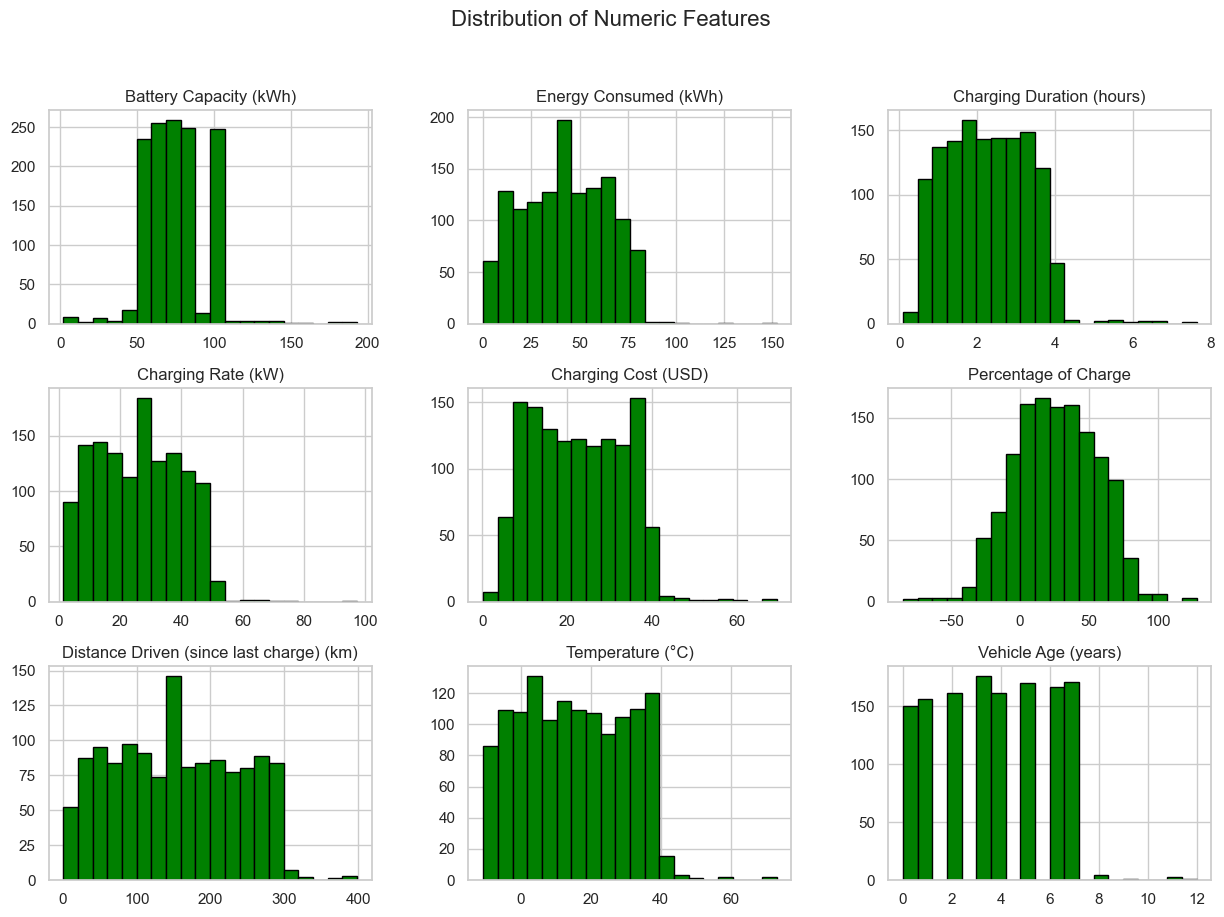

In [197]:
# Visualizar la distribución de las variables antiguas
old_features = ['Battery Capacity (kWh)', 'Energy Consumed (kWh)', 'Charging Duration (hours)',
                'Charging Rate (kW)', 'Charging Cost (USD)', 'Percentage of Charge', 'Distance Driven (since last charge) (km)',
                'Temperature (°C)', 'Vehicle Age (years)']

# Graficar histogramas para las variables antiguas
raw_data[old_features].hist(bins=20, figsize=(15, 10), color='Green', edgecolor='black')
plt.suptitle('Distribution of Numeric Features', fontsize=16)
plt.show()


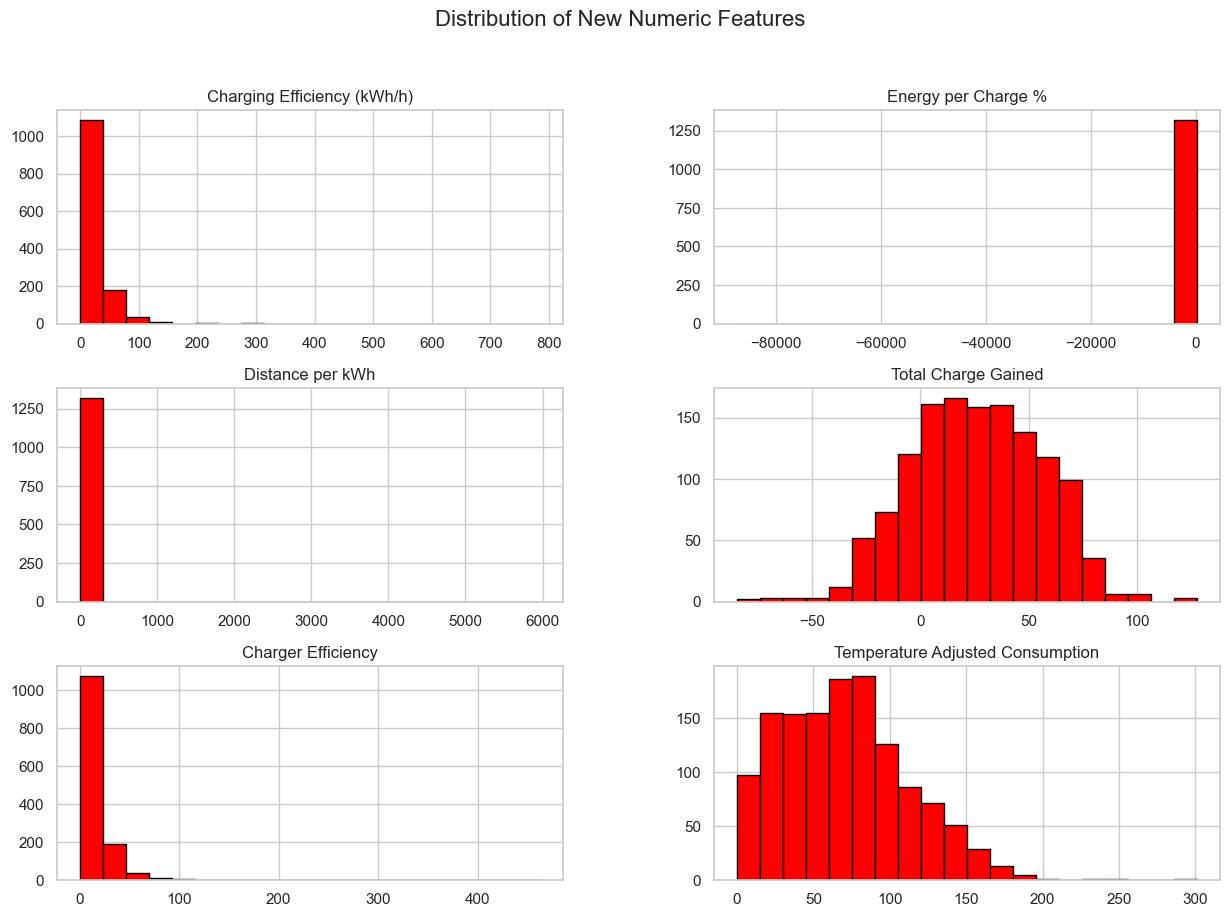

In [198]:
import matplotlib.pyplot as plt

# Visualize the distribution of new features
new_features = ['Charging Efficiency (kWh/h)', 'Energy per Charge %',
                'Distance per kWh', 'Total Charge Gained',
                'Charger Efficiency', 'Temperature Adjusted Consumption']

# Plot histograms for new features
raw_data[new_features].hist(bins=20, figsize=(15,10), color='red', edgecolor='black')
plt.suptitle('Distribution of New Numeric Features', fontsize=16)
plt.show()

1. ***Charging Efficiency (kWh/h)***: Calcula la cantidad de energía suministrada por hora, lo que indica la eficiencia de la carga en función del tiempo. Es útil para ver qué tan rápido un cargador carga una batería específica, proporcionando una medida directa de rendimiento que puede ser más informativa que el simple "Charging Rate".

2. ***Energy per Charge %***: Relaciona la energía consumida con el porcentaje de carga. Esto permite ver cuánta energía se usa para aumentar el SoC (State of Charge) en una unidad porcentual, lo que ayuda a evaluar la eficiencia energética y a identificar posibles pérdidas.

3. ***Distance per kWh***: Mide la distancia recorrida por cada kWh, lo cual es fundamental para analizar la eficiencia del vehículo. Esta característica puede ayudar a modelar el impacto de la distancia en el consumo de energía, proporcionando información sobre el rendimiento del vehículo.

4. ***Total Charge Gained***: Indica el incremento total en el SoC durante una sesión de carga. Es relevante para ver cuánta carga neta se añade a la batería, proporcionando un resumen que puede estar correlacionado con el tiempo y la energía consumida.

5. ***Charger Efficiency***: Compara la tasa de carga con la energía que realmente se convierte en carga de la batería. Esto permite evaluar la eficiencia real de cada tipo de cargador y podría ser útil para seleccionar estaciones de carga óptimas.

6. ***Temperature Adjusted Consumption***: Ajusta el consumo de energía en función de la temperatura, teniendo en cuenta que el clima afecta el rendimiento de la batería. Esta característica ayuda a incorporar los efectos de las condiciones ambientales, mejorando el ajuste del modelo en escenarios variados.

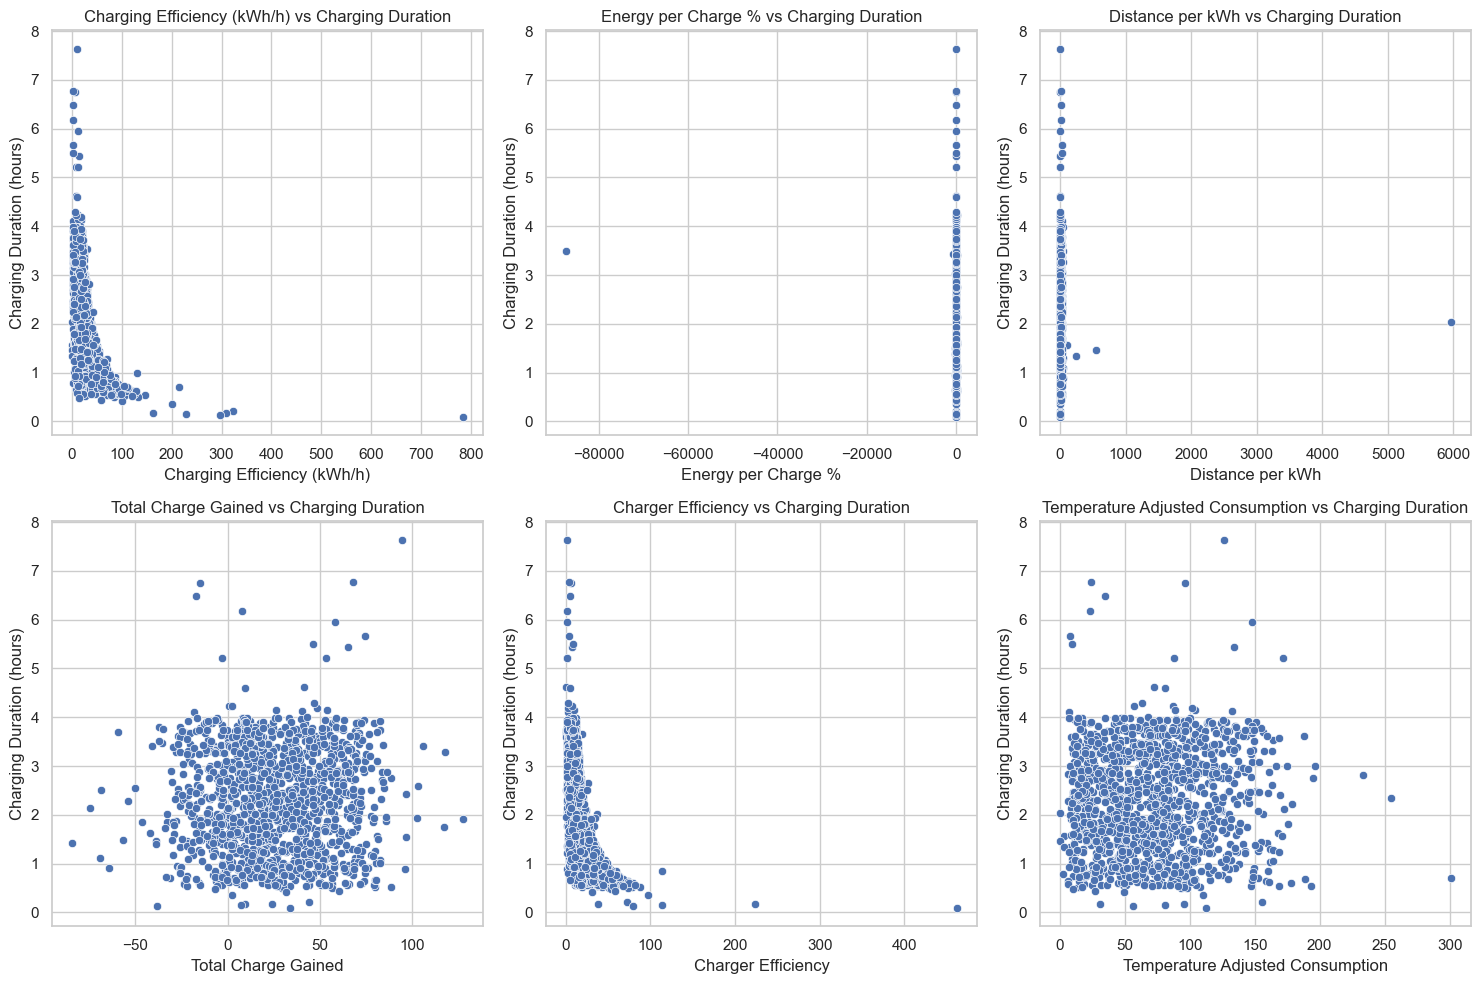

In [199]:
import seaborn as sns


plt.figure(figsize=(15,10))

for i, feature in enumerate(new_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=raw_data[feature], y=raw_data['Charging Duration (hours)'])
    plt.title(f'{feature} vs Charging Duration', fontsize=12)
    plt.xlabel(feature)
    plt.ylabel('Charging Duration (hours)')

plt.tight_layout()
plt.show()

## Feature Selection:

In [200]:
# Eliminar columnas irrelevantes para análisis
data_cleaned = raw_data.drop(columns=['User ID', 'Charging Station ID', 'Charging Start Time', 
                                      'Charging End Time', 'State of Charge (Start %)', 'State of Charge (End %)', 'User Type', 'Day of Week', 'Time of Day'])

# Cambiar el nombre de una columna para mayor claridad
data_cleaned.rename(columns={'Distance Driven (since last charge) (km)': 'Distance Driven(km)'}, inplace=True)

# Verificación para comprobar que no hay NaN values
print(raw_data.isna().sum())

# Verifica los cambios en las columnas
print(raw_data[['Battery Capacity (kWh)', 'Vehicle Age (years)']].head())

# Mostrar el DataFrame resultante
data_cleaned


User ID                                     0
Vehicle Model                               0
Battery Capacity (kWh)                      0
Charging Station ID                         0
Charging Station Location                   0
Charging Start Time                         0
Charging End Time                           0
Energy Consumed (kWh)                       0
Charging Duration (hours)                   0
Charging Rate (kW)                          0
Charging Cost (USD)                         0
Time of Day                                 0
Day of Week                                 0
State of Charge (Start %)                   0
State of Charge (End %)                     0
Distance Driven (since last charge) (km)    0
Temperature (°C)                            0
Vehicle Age (years)                         0
Charger Type                                0
User Type                                   0
Percentage of Charge                        0
Charging Efficiency (kWh/h)       

Vehicle Model  Battery Capacity (kWh) Charging Station Location  \
0           BMW i3                   108.0                   Houston   
1     Hyundai Kona                   100.0             San Francisco   
2       Chevy Bolt                    75.0             San Francisco   
3     Hyundai Kona                    50.0                   Houston   
4     Hyundai Kona                    50.0               Los Angeles   
...            ...                     ...                       ...   
1315   Nissan Leaf                   100.0                  New York   
1316        BMW i3                   100.0                  New York   
1317   Nissan Leaf                   100.0                  New York   
1318    Chevy Bolt                    85.0             San Francisco   
1319   Nissan Leaf                   120.0               Los Angeles   

      Energy Consumed (kWh)  Charging Duration (hours)  Charging Rate (kW)  \
0                 60.712346                   0.591363           36.389181   
1                 12.339275                   3.133652           30.677735   
2                 19.128876                   2.452653           27.513593   
3                 79.457824                   1.266431           32.882870   
4                 19.629104                   2.019765           10.215712   
...                     ...                        ...                 ...   
1315              42.011654                   1.426444            5.895475   
1316              68.185853                   3.238212           18.388012   
1317              18.895102                   3.267122           45.482066   
1318              13.756252                   2.754527           38.148183   
1319              63.652570                   3.740970           33.704226   

      Charging Cost (USD)  Distance Driven(km)  Temperature (°C)  \
0               13.087717           293.602111         27.947953   
1               21.128448           112.112804         14.311026   
2               35.667270            71.799253         21.002002   
3               13.036239           199.577785         38.316313   
4               10.161471           203.661847         -7.834199   
...                   ...                  ...               ...   
1315            22.081164           239.601075          1.919655   
1316             5.067806           164.376022         34.029775   
1317            37.255002           226.519258         20.358761   
1318            39.046146           291.494076         24.134598   
1319            10.863674            14.449236         -6.966593   

      Vehicle Age (years)     Charger Type  Percentage of Charge  \
0                     2.0  DC Fast Charger             56.748386   
1                     3.0          Level 1             74.548566   
2                     2.0          Level 2             63.063011   
3                     1.0          Level 1             16.504325   
4                     1.0          Level 1              9.484836   
...                   ...              ...                   ...   
1315                  7.0  DC Fast Charger             44.711850   
1316                  4.0          Level 2             61.640087   
1317                  5.0  DC Fast Charger              6.775798   
1318                  5.0          Level 2            -10.261424   
1319                  5.0  DC Fast Charger             -2.645636   

      Charging Efficiency (kWh/h)  Energy per Charge %  Distance per kWh  \
0                      102.665033             1.069851          4.835954   
1                        3.937666             0.165520          9.085850   
2                        7.799260             0.303330          3.753449   
3                       62.741544             4.814364          2.511745   
4                        9.718509             2.069525         10.375504   
...                           ...                  ...               ...   
1315                    29.452011    

In [178]:
data_cleaned.describe()

Battery Capacity (kWh)  Energy Consumed (kWh)  \
count             1320.000000            1320.000000   
mean                74.535606              42.645320   
std                 20.624561              21.843794   
min                  2.000000               0.045772   
25%                 62.000000              24.868084   
50%                 75.000000              42.691405   
75%                 85.000000              60.545496   
max                193.000000             152.238758   

       Charging Duration (hours)  Charging Rate (kW)  Charging Cost (USD)  \
count                1320.000000         1320.000000          1320.000000   
mean                    2.269377           25.945043            22.551352   
std                     1.061037           13.656504            10.751494   
min                     0.095314            1.472549             0.234317   
25%                     1.397623           14.431294            13.368141   
50%                     2.258136           25.603799            22.076360   
75%                     3.112806           36.955838            31.646044   
max                     7.635145           97.342255            69.407743   

       Distance Driven(km)  Temperature (°C)  Vehicle Age (years)  \
count          1320.000000       1320.000000          1320.000000   
mean            153.529942         15.263591             3.616667   
std              83.826126         14.831216             2.313233   
min               0.862361        -10.724770             0.000000   
25%              81.931571          2.800664             2.000000   
50%             152.259867         14.630846             4.000000   
75%             221.962330         27.981810             6.000000   
max             398.364775         73.169588            12.000000   

       Percentage of Charge  Charging Efficiency (kWh/h)  Energy per Charge %  \
count           1320.000000                  1320.000000          1320.000000   
mean              26.011578                    26.461599           -66.878930   
std               29.814729                    34.447377          2402.578164   
min              -84.360948                     0.022403        -87283.672722   
25%                4.808443                    10.943178             0.219325   
50%               24.996490                    18.985053             0.945447   
75%               47.721784                    30.264062             1.955833   
max              127.463125                   784.135184           142.019585   

       Distance per kWh  Total Charge Gained  Charger Efficiency  \
count       1320.000000          1320.000000         1320.000000   
mean          10.917821            26.011578           15.924050   
std          164.905260            29.814729           19.493657   
min            0.020200           -84.360948            0.479846   
25%            1.904439             4.808443            6.373000   
50%            3.564929            24.996490           11.629563   
75%            6.712365            47.721784           19.172454   
max         5962.569012           127.463125          462.159725   

       Temperature Adjusted Consumption  
count                       1320.000000  
mean                          71.071411  
std                           41.494675  
min                            0.091853  
25%                           38.678524  
50%                           67.902858  
75%                           96.863609  
max                          300.990916

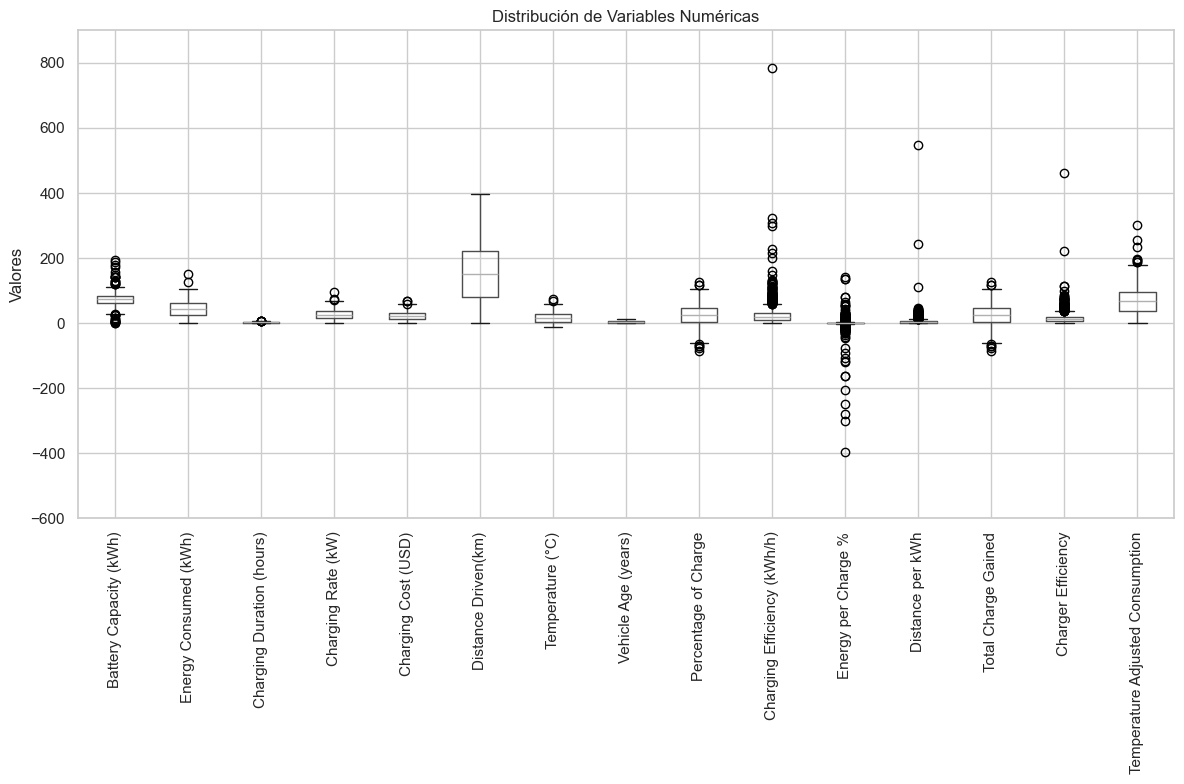

In [211]:
numeric_columns = data_cleaned.describe().columns  # Seleccionar las columnas numéricas a partir de describe()

# Generar el gráfico de boxplot
plt.figure(figsize=(12, 8))
data_cleaned[numeric_columns].boxplot()
plt.title("Distribución de Variables Numéricas")
plt.xticks(rotation=90)
plt.ylabel("Valores")
plt.grid(True)
plt.ylim(-600, 900)# hay un oulier enorme en -8000
plt.tight_layout()
plt.show()

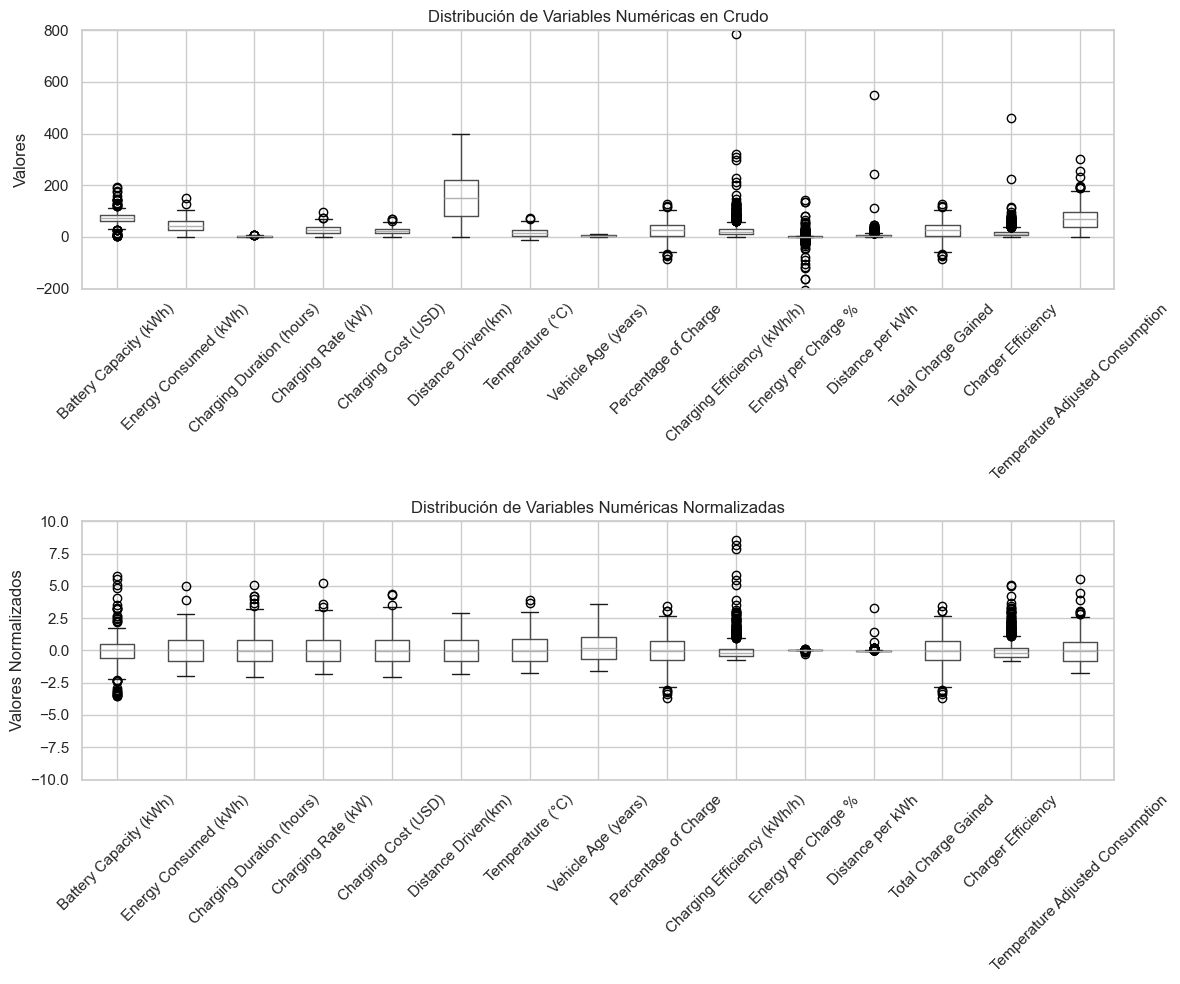

In [213]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Normalizar los datos
scaler = StandardScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data_cleaned[numeric_columns]), columns=numeric_columns)

# Crear subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Gráfico boxplot con datos en crudo
data_cleaned[numeric_columns].boxplot(ax=axs[0])
axs[0].set_title("Distribución de Variables Numéricas en Crudo")
axs[0].set_xticklabels(numeric_columns, rotation=45)
axs[0].set_ylabel("Valores")
axs[0].grid(True)
axs[0].set_ylim(-200, 800)

# Gráfico boxplot con datos normalizados
data_normalized.boxplot(ax=axs[1])
axs[1].set_title("Distribución de Variables Numéricas Normalizadas")
axs[1].set_xticklabels(numeric_columns, rotation=45)
axs[1].set_ylabel("Valores Normalizados")
axs[1].grid(True)
axs[1].set_ylim(-10, 10) #Se han cortado muchos outliers 

# Ajustar el layout
plt.tight_layout()
plt.show()

/var/folders/0f/x_tx7rbx6ss_pm165nny66fh0000gn/T/ipykernel_43409/1779060944.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = data_cleaned.groupby(['Time of Day', 'Day of Week']).size().unstack(fill_value=0)


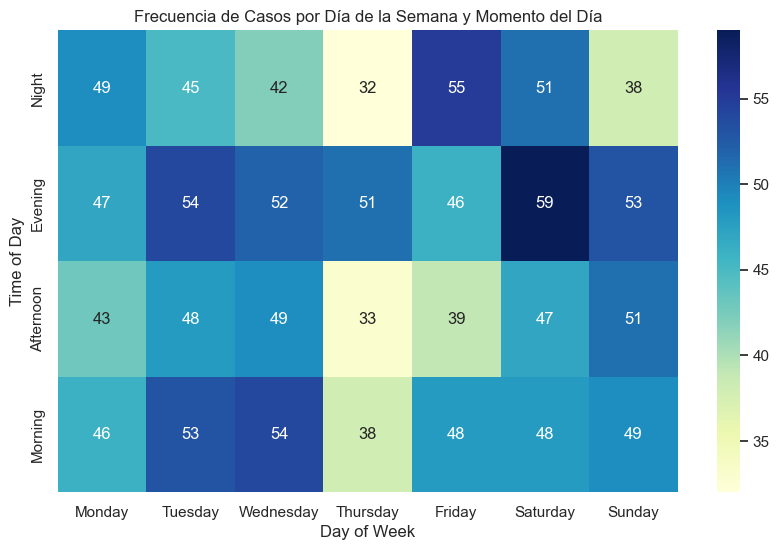

In [184]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype


# Definir el orden deseado de los días de la semana
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_type = CategoricalDtype(categories=days_order, ordered=True)
data_cleaned['Day of Week'] = data_cleaned['Day of Week'].astype(day_type)

# Si necesitas un orden específico para 'Time of Day', puedes definirlo también
time_order = ["Night", "Evening", "Afternoon", "Morning"]
time_type = CategoricalDtype(categories=time_order, ordered=True)
data_cleaned['Time of Day'] = data_cleaned['Time of Day'].astype(time_type)

# Agrupar los datos y contar las ocurrencias para cada combinación de día y momento del día
heatmap_data = data_cleaned.groupby(['Time of Day', 'Day of Week']).size().unstack(fill_value=0)

# Crear el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", cbar=True)

# Configurar los ejes y el título
plt.xlabel("Day of Week")
plt.ylabel("Time of Day")
plt.title("Frecuencia de Casos por Día de la Semana y Momento del Día")
plt.show()


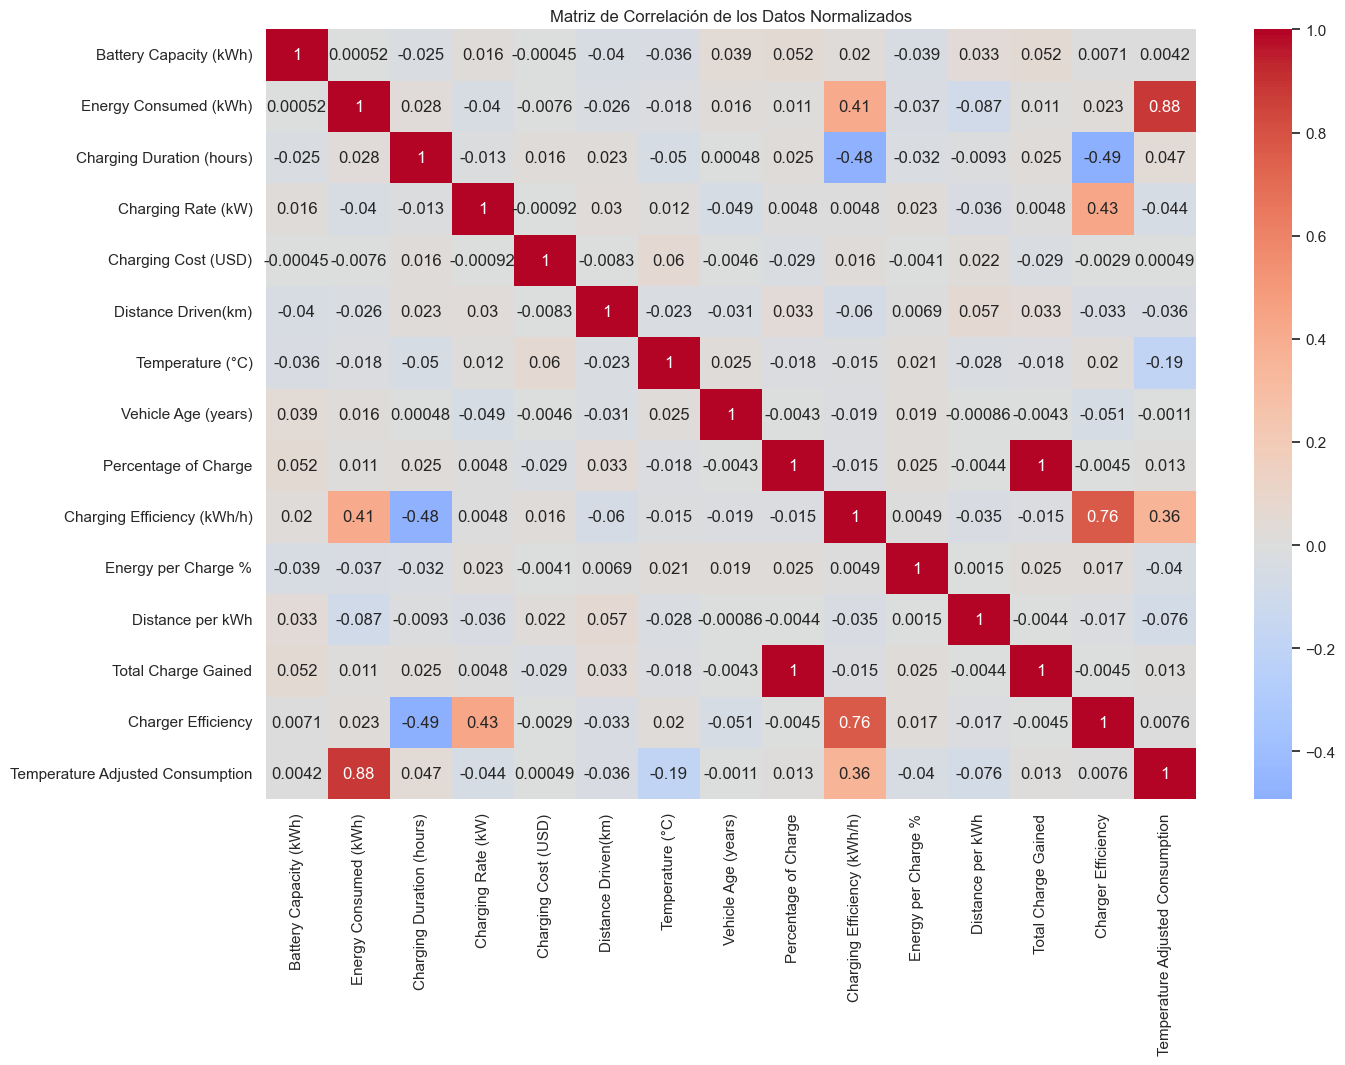

In [216]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Filtrar solo las columnas numéricas
numerical_data = data_cleaned.select_dtypes(include=['float64', 'int64'])

# Normalizar los datos (usando StandardScaler para estandarización)
scaler = StandardScaler()
numerical_data_normalized = scaler.fit_transform(numerical_data)

# Crear un DataFrame de los datos normalizados, usando los mismos nombres de columnas
numerical_data_normalized = pd.DataFrame(numerical_data_normalized, columns=numerical_data.columns)

# Calcular la matriz de correlación
correlation_matrix = numerical_data_normalized.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de Correlación de los Datos Normalizados")
plt.show()


<Figure size 1200x1200 with 0 Axes>

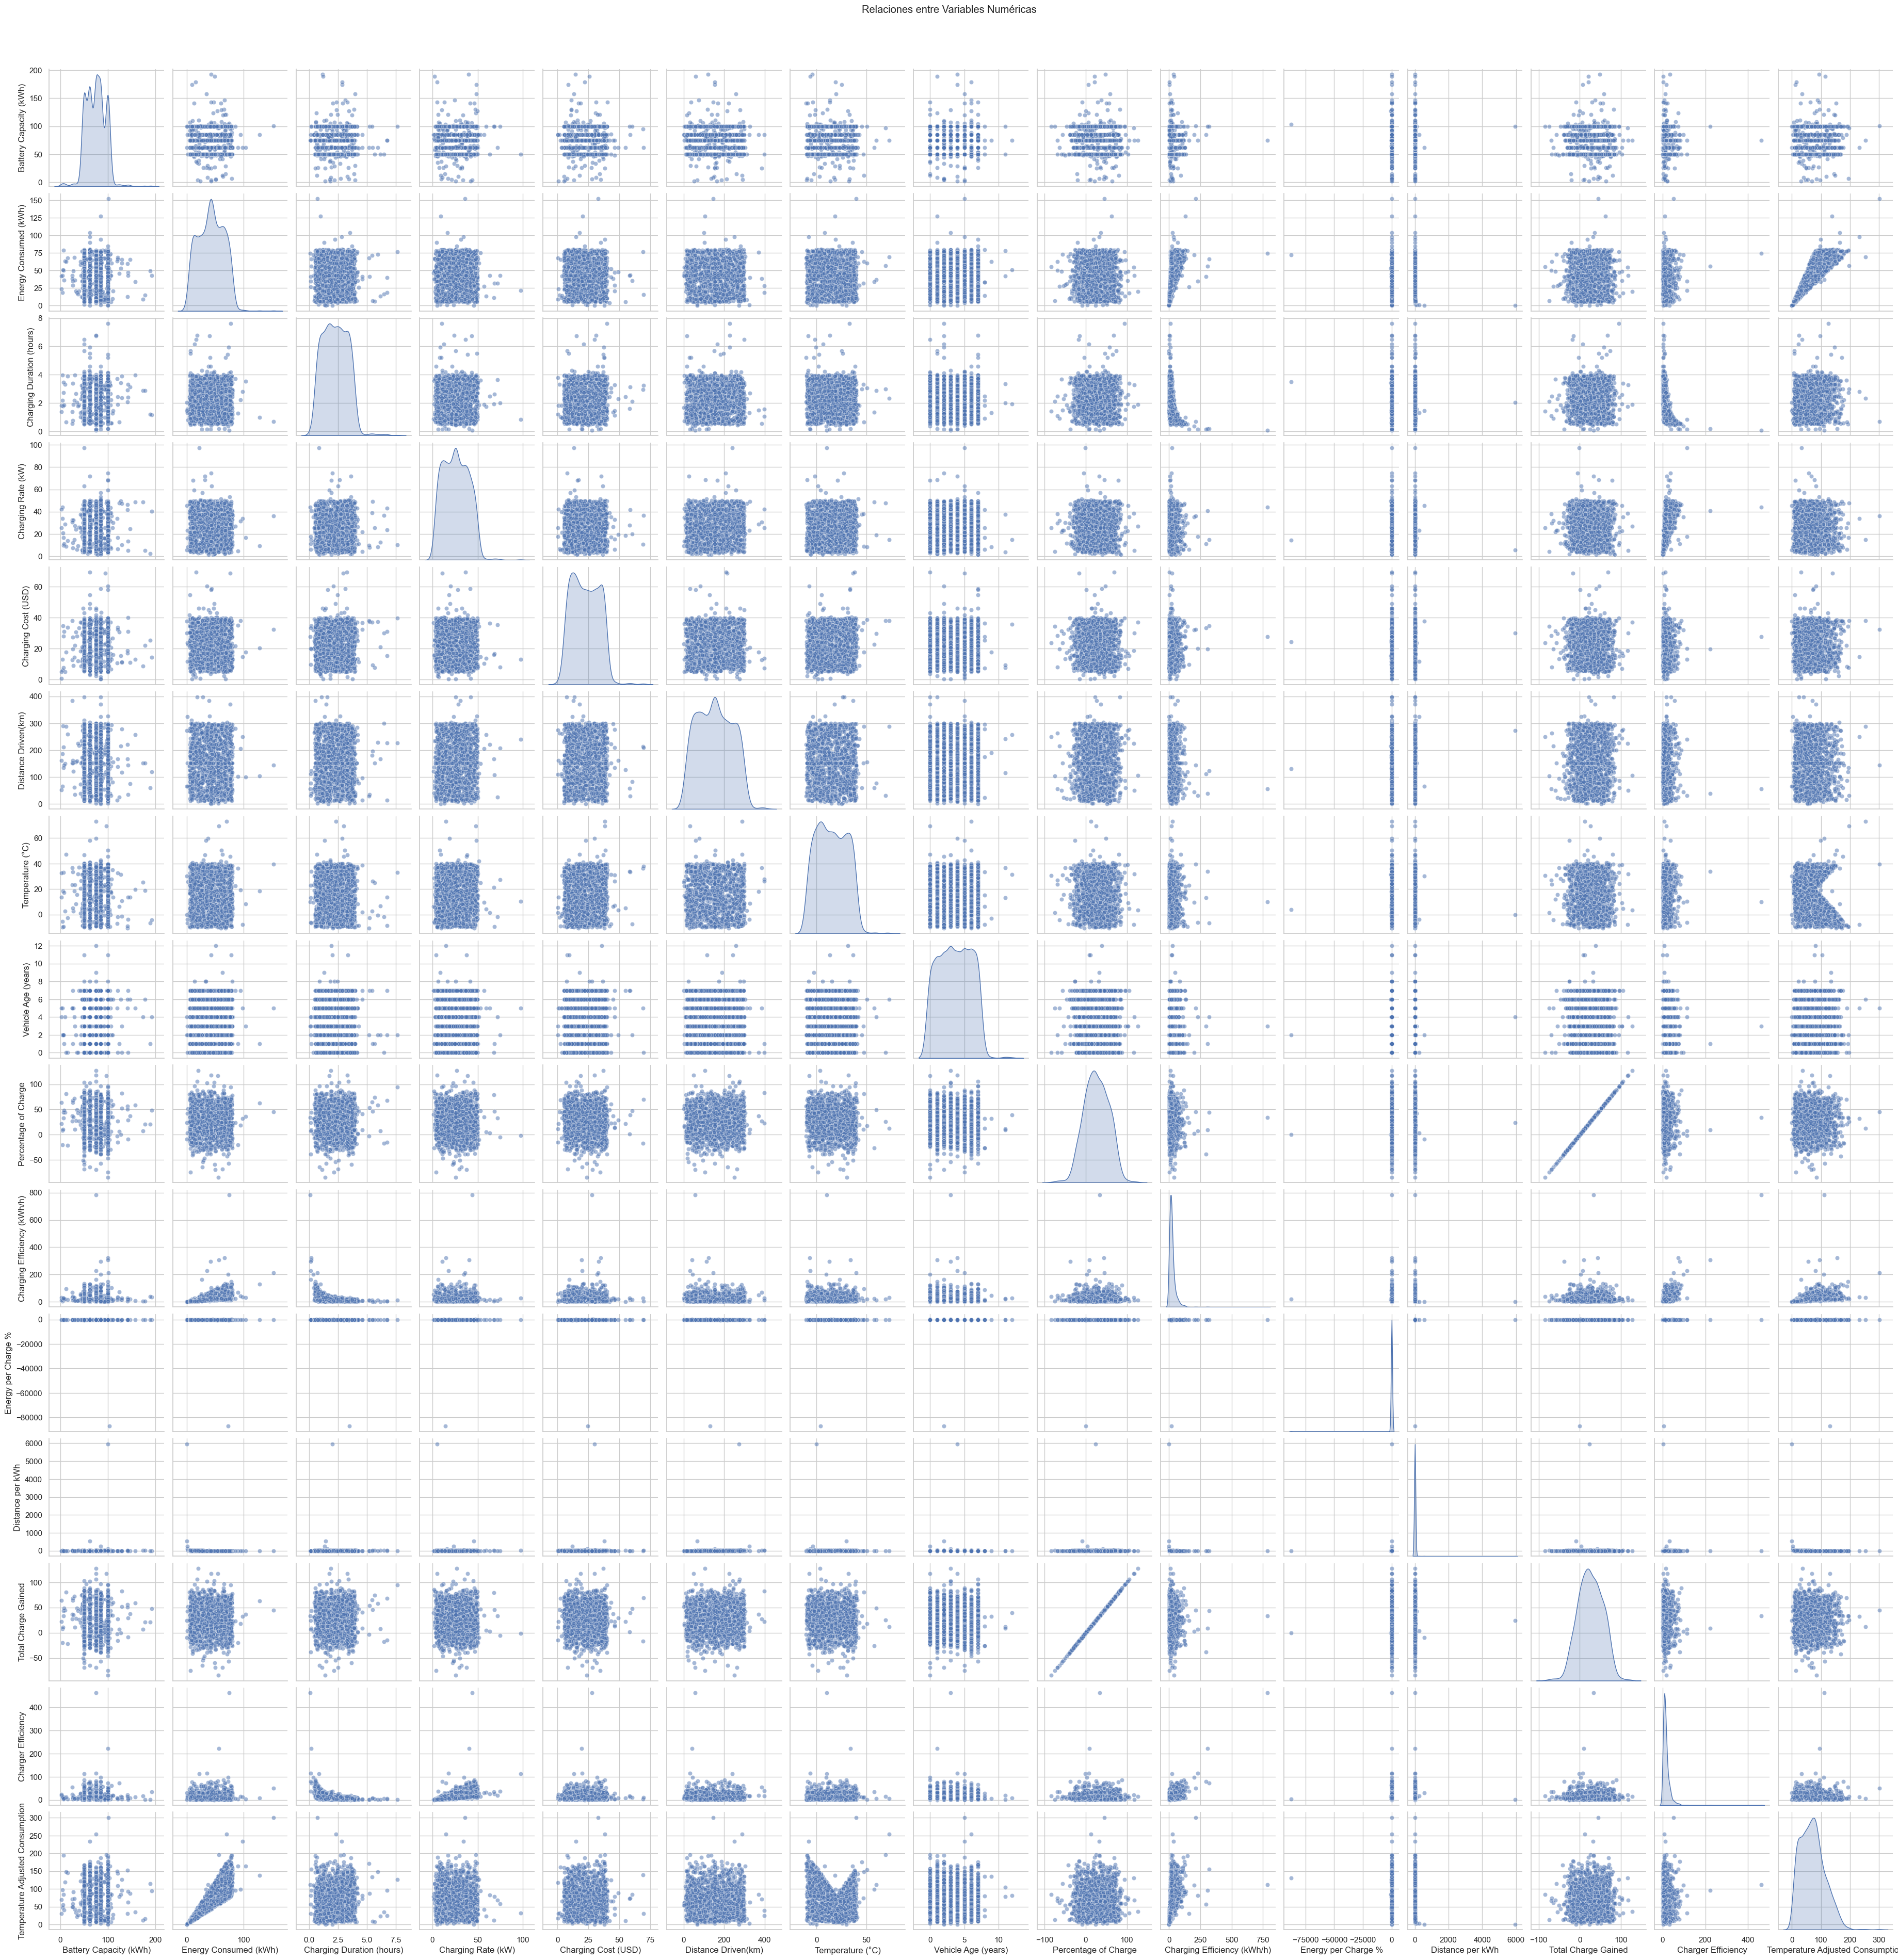

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de pares para todas las variables numéricas
plt.figure(figsize=(12, 12))
sns.pairplot(data_cleaned, diag_kind='kde', plot_kws={'alpha': 0.5})

plt.suptitle("Relaciones entre Variables Numéricas", y=1.02)
plt.show()


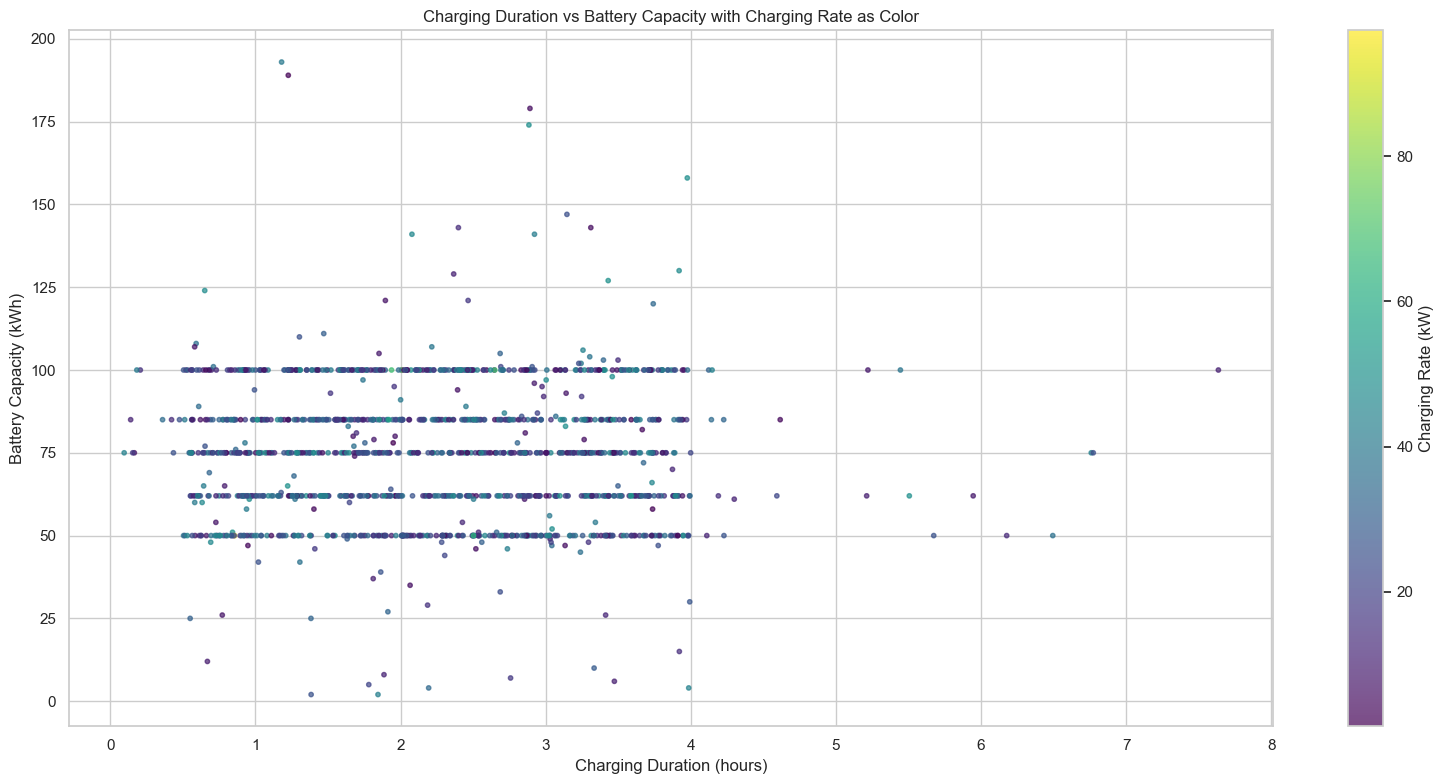

In [192]:
# 2D Scatter plot of Charging Duration vs Battery Capacity with Charging Rate as color
plt.figure(figsize=(16, 8))
scatter = plt.scatter(
    data_cleaned['Charging Duration (hours)'], 
    data_cleaned['Battery Capacity (kWh)'], 
    c=data_cleaned['Charging Rate (kW)'], 
    cmap='viridis',
    alpha=0.7,
    s=10
)

# Adding color bar to represent Charging Rate
cbar = plt.colorbar(scatter)
cbar.set_label('Charging Rate (kW)')

# Labels and title
plt.title('Charging Duration vs Battery Capacity with Charging Rate as Color')
plt.xlabel('Charging Duration (hours)')
plt.ylabel('Battery Capacity (kWh)')
plt.tight_layout()
plt.show()


# Anotaciones del trabajo:

tenemos 1320 filas y 20 columnas

* Columnas a borrar en el dataset:
    - User ID
    - Charging Start Time
    - Charging End Time



Preguntas:

- ¿Cuáles son las principales variables que influyen en el tiempo total de carga?


Gráficas sencillas:

- Picos de carga agrupados en momento de día y día: 7*4= 28 momentos
- Matriz de relaciones que influye más en la duración de la carga o en el coste. (solo datos numericos).

Preguntas sacadas de internet (Jaime):

* Análisis de comportamiento de carga:

¿Cuál es la variación del tiempo de carga en función de diferentes horas del día o días de la semana?
¿Existe una relación entre el tiempo de carga y la tarifa de energía en distintas estaciones o franjas horarias?
¿Se observan patrones estacionales en el uso de estaciones de carga (por ejemplo, diferencias entre invierno y verano)?

* Segmentación de usuarios y patrones de uso:

¿Existen diferentes perfiles de usuarios (según tiempo medio de carga, frecuencia de uso, etc.) y cómo varían sus comportamientos?
¿Qué diferencias existen en los patrones de carga entre usuarios particulares y comerciales, si el dataset contiene esta información?
¿Qué factores parecen influir más en la elección de una estación de carga específica?

* Predicción y optimización:

¿Qué variables tienen el mayor impacto en la duración del tiempo de carga y en la frecuencia de uso de las estaciones?
¿Es posible predecir las horas pico de uso en función de los datos históricos?
¿Qué características del punto de carga (como potencia, ubicación) predicen un mayor número de usuarios?

* Impacto en la infraestructura de carga:

¿Cuáles son los puntos de carga con mayor uso, y qué características tienen en común?
¿Cómo varía la demanda de carga según la proximidad a áreas urbanas o rurales?
¿Existen patrones de uso que sugieren la necesidad de ampliar la infraestructura en ciertas áreas?

* Sostenibilidad y Eficiencia Energética:

¿Cuánto tiempo, en promedio, permanecen los vehículos conectados después de estar completamente cargados?
¿Cuál es la tasa de eficiencia en el uso de las estaciones de carga? ¿Se producen períodos significativos de inactividad?
¿Cómo afecta el tiempo de conexión a la eficiencia de la infraestructura de carga en general?

* Tendencias de adopción de EV:

¿Se observa un crecimiento en la cantidad de sesiones de carga a lo largo del tiempo? ¿Es consistente en todas las estaciones?
¿Qué patrones emergentes indican un aumento en la adopción de vehículos eléctricos en ciertas áreas o tipos de usuarios?

Posibles Preguntas de Análisis (Luis)
* Patrones de Consumo y Eficiencia:
-¿Cuál es la relación entre el Estado de Carga al inicio y final y la Energía Consumida?
-¿Cómo varía el Costo de Carga en función del Ubicación de la Estación o el Tipo de Cargador?

* Factores que Afectan la Duración y Costo de la Carga:
¿Cómo influyen el Modelo de Vehículo, la Capacidad de Batería y la Edad del Vehículo en el Costo de Carga y el Tiempo de Carga?
¿Qué impacto tiene la Temperatura en la Duración de Carga y Eficiencia?

* Análisis de Uso del Cargador por Tipo de Usuario:
¿Qué diferencias existen entre los patrones de carga de los usuarios clasificados como Commuters frente a los Long-Distance Travelers?
¿Existe una tendencia en el Horario de Carga según el Tipo de Usuario?

* Análisis de Localización y Estaciones de Carga:
¿Cuáles son los lugares con mayor consumo de energía, y cómo varía el Tiempo de Carga entre distintas Ubicaciones?
¿Se identifican patrones de alta demanda según el Día de la Semana o la Hora del Día?


# Anotaciones para la presentación:

- Decir algunas de las preguntas que podíamos hacernos o intentar predecir y porque finalmente nos quedamos con el time duration. (Otras opciones el coste de cargar el coche).
- Decir porque hemos quitado ciertas características del dataset.
- Decir porque hemos añadido otras características.